# Exploratory Data Analysis: Part I

We will explore the dataset consisting of user's listening activity. The first part of the EDA is exploring the dataset without the Spotify audio features. The purpose of this analysis is to understand the users listening behavior and see if there are any aspects of our data that may skew our recommendations.

* How many different songs does a user actually listen to?
* How many times is each song listened to?
* How many unique users listen to each song?
* Whats the total listen count of each user? 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#import dataset
user_df = pd.read_csv('User_SongFeatures_data.csv')

In [2]:
user_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year,song,id,name,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri_y,valence
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,stronger,Graduation,kanye west,2007,Stronger - Kanye West,4fzsfWzRhPawzqhX8Qt9F3,stronger,...,0.408,-7.858,0,0.153,103.992,4,https://api.spotify.com/v1/tracks/4fzsfWzRhPaw...,audio_features,spotify:track:4fzsfWzRhPawzqhX8Qt9F3,0.49
1,9fba771d9731561eba47216f6fbfc0023d88641b,SOBXHDL12A81C204C0,19,stronger,Graduation,kanye west,2007,Stronger - Kanye West,4fzsfWzRhPawzqhX8Qt9F3,stronger,...,0.408,-7.858,0,0.153,103.992,4,https://api.spotify.com/v1/tracks/4fzsfWzRhPaw...,audio_features,spotify:track:4fzsfWzRhPawzqhX8Qt9F3,0.49
2,85952991b8e3ca5803a08b0b2f9c6d71abf9bb5b,SOBXHDL12A81C204C0,1,stronger,Graduation,kanye west,2007,Stronger - Kanye West,4fzsfWzRhPawzqhX8Qt9F3,stronger,...,0.408,-7.858,0,0.153,103.992,4,https://api.spotify.com/v1/tracks/4fzsfWzRhPaw...,audio_features,spotify:track:4fzsfWzRhPawzqhX8Qt9F3,0.49
3,537340ff896dea11328910013cfe759413e1eeb3,SOBXHDL12A81C204C0,2,stronger,Graduation,kanye west,2007,Stronger - Kanye West,4fzsfWzRhPawzqhX8Qt9F3,stronger,...,0.408,-7.858,0,0.153,103.992,4,https://api.spotify.com/v1/tracks/4fzsfWzRhPaw...,audio_features,spotify:track:4fzsfWzRhPawzqhX8Qt9F3,0.49
4,8fce200f3912e9608e3b1463cdb9c3529aab5c08,SOBXHDL12A81C204C0,2,stronger,Graduation,kanye west,2007,Stronger - Kanye West,4fzsfWzRhPawzqhX8Qt9F3,stronger,...,0.408,-7.858,0,0.153,103.992,4,https://api.spotify.com/v1/tracks/4fzsfWzRhPaw...,audio_features,spotify:track:4fzsfWzRhPawzqhX8Qt9F3,0.49


In [3]:
user_df.song_id.nunique()

5763

In [4]:
user_df.user_id.nunique()

74905

Before we get into EDA, we want to see if there any songs with multiple song ids.

In [5]:
user_df.song.nunique()

5730

Since there are a different number of unique song id's and unique song names that tells us that there are songs with multiple song id's. 

In [6]:
song_id_count = user_df.groupby('song').nunique()[['song_id']].rename(columns={'song_id':'id_count'}).reset_index()
dups = song_id_count[song_id_count['id_count'] > 1]
print(dups)
print(len(dups))

                                                 song  id_count
12             ...Baby One More Time - Britney Spears         2
383                     Back To Black - Amy Winehouse         2
1046             Damn Girl - The All-American Rejects         2
1255                             Dream On - Aerosmith         2
1260                        Dreamlover - Mariah Carey         2
1339                             Electric Feel - MGMT         2
1595                  Forever & Always - Taylor Swift         2
1800                      Goodbye - Kristinia DeBarge         2
1924                Heads Will Roll - Yeah Yeah Yeahs         2
1939                        Hearts On Fire - Cut Copy         2
2032                   Holes To Heaven - Jack Johnson         2
2094                              Human - The Killers         4
2103                    Hustler - Simian Mobile Disco         2
2191  I Still Haven't Found What I'm Looking For - U2         2
2576                 King Without A Crow

There are 29 songs that have more than one song id. We do not want to treat these songs as separate songs as it will skew our recommendations. We tells us that when we building our model we should use the listen counts of song names rather than song id. 

### How many different songs does a user actually listen to?

We want to explore the distribution of how many different songs each user listens to. For example, we would not have a valid data set for a recommendation engine is 90% of users have only listened to one song.

In [7]:
# explore distribution of how many songs a user actually listens to

song_count = user_df.groupby('user_id').count()[['song_id']].rename(columns={'song_id':'song_count'})
song_count.describe()


,song_count
count,74905.000000
mean,15.260343
std,20.031126
min,1.000000
25%,5.000000
50%,9.000000
75%,18.000000
max,458.000000


In [8]:
len(song_count[song_count['song_count'] == 1])

3355

3357 users in our dataset have only listened to one unique song. Also, notice that at the 75th percentile users listen to only 18 songs. With our max song count at 458, this indicates that the distribution is very spread out. Let's look at the distribution of the song count to better visualize this.

Text(0.5, 0, 'Number of unique songs a user listens to')

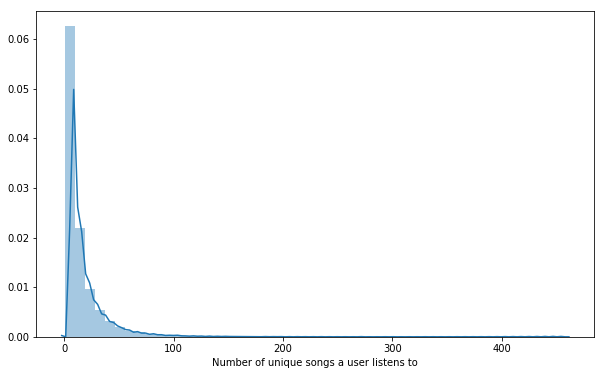

In [9]:
fig1 = plt.figure(figsize=(10,6))

sns.distplot(song_count)
plt.xlabel("Number of unique songs a user listens to")

The plot shows that most users listen to less than 100 songs. Let's take a closer look at the box plot of this distribution.

Text(0.5, 1.0, 'Boxplot of Total Songs a User Has Listened to')

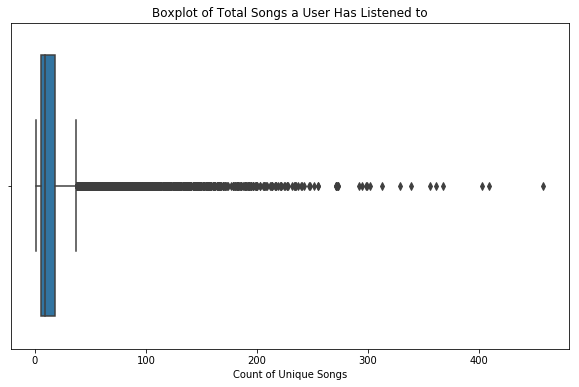

In [10]:
fig2 = plt.figure(figsize=(10,6))

sns.boxplot(song_count)
plt.xlabel("Count of Unique Songs")
plt.title("Boxplot of Total Songs a User Has Listened to")

In [11]:
len(song_count[song_count['song_count'] > 300])

10

Since we are building a recommendation system, outliers are treated differently as it is valid data of human activity. Also, the percentage of users that have only listened to one song is low so we can conclude that our data is valid for our model.


### How many times is each song listened to?

Now lets explore the number of times each song is listened to by users. We want to see if there are any outliers so that our analysis is not skewed when recommending songs. For example, we wouldn't want a song to be recommended to users only because it's listen count is considerably higher than all other songs.

In [12]:
# explore distribution of how many times a song is listened to

listen_count = user_df.groupby('song').sum()[['listen_count']]
listen_count.describe()


,listen_count
count,5730.000000
mean,574.000698
std,1055.835533
min,71.000000
25%,218.000000
50%,333.000000
75%,575.750000
max,41418.000000


A song at the 75th percentile is listened to 575 times. The max number of listens is 41,418. Again, this indicates that we have large variance in our data. Let's look at the distribution of the listen counts and zoom in on our outliers.

Text(0.5, 0, 'Number of times a song is listened to')

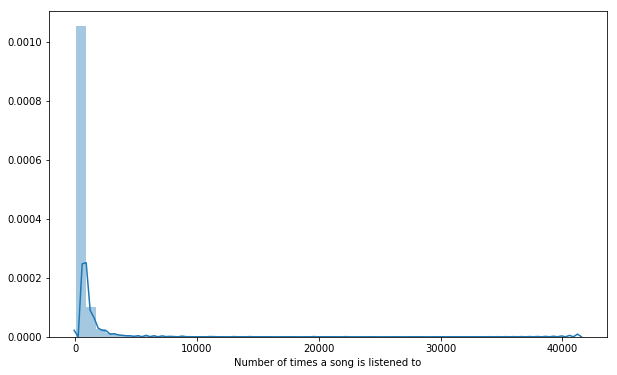

In [13]:
fig3 = plt.figure(figsize=(10,6))

sns.distplot(listen_count)
plt.xlabel("Number of times a song is listened to")

Text(0.5, 1.0, 'Boxplot of Song Listen Counts')

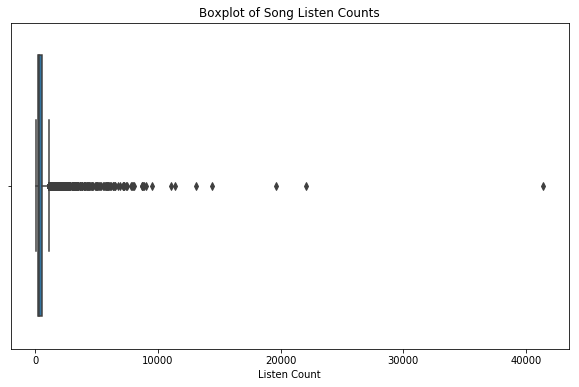

In [14]:
fig4 = plt.figure(figsize=(10,6))

sns.boxplot(listen_count)
plt.xlabel("Listen Count")
plt.title("Boxplot of Song Listen Counts")

In [15]:
len(listen_count[listen_count['listen_count'] > 10000])

7

From the boxplot you can see that there are a few songs with very high listen counts. We want to keep these songs in mind during our modeling stage so that they wont be recommended to users just because of their popularity. Do these songs have a lot of people that listen to them, or do a few users listens to these songs very frequently?

Text(0.5, 1.0, 'Most Popular Songs (> 10,000 listens)')

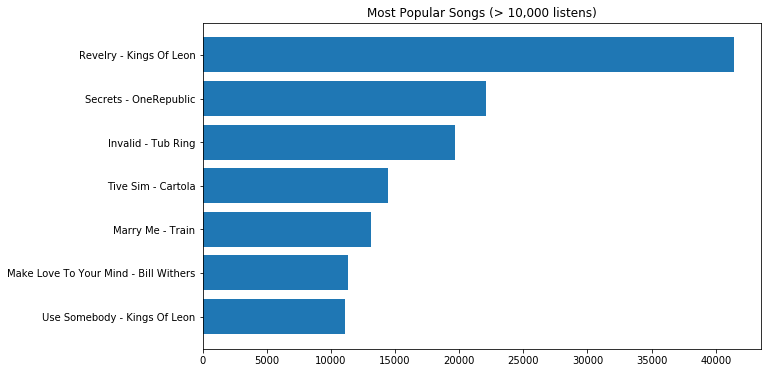

In [16]:
# we'll subset the outliers (songs with listened to over 20000 times)
pop_songs = listen_count[listen_count['listen_count'] > 10000].sort_values('listen_count', ascending = True)

#visualize top songs
fig4 = plt.figure(figsize=(10,6))

plt.barh(pop_songs.index, pop_songs.listen_count)
plt.title("Most Popular Songs (> 10,000 listens)")


In [17]:
user_df[user_df['song'].isin(pop_songs.index)][['user_id', 'song']].groupby('song').count()[['user_id']]

,user_id
song,
Invalid - Tub Ring,2887
Make Love To Your Mind - Bill Withers,1481
Marry Me - Train,3578
Revelry - Kings Of Leon,6145
Secrets - OneRepublic,5841
Tive Sim - Cartola,4548
Use Somebody - Kings Of Leon,3976


### How many unique users listen to each song?

Do these user counts align with the user count distribution of all songs?

In [18]:
user_count = user_df.groupby('song').count()[['user_id']]
print(user_count.describe())
user_song_count = pd.concat([user_count, listen_count], axis=1)

user_song_count.sort_values('listen_count', ascending = False).head(8)

           user_id
count  5730.000000
mean    199.489703
std     276.507772
min      48.000000
25%      90.000000
50%     127.000000
75%     206.000000
max    6145.000000


,user_id,listen_count
song,,
Revelry - Kings Of Leon,6145,41418
Secrets - OneRepublic,5841,22100
Invalid - Tub Ring,2887,19645
Tive Sim - Cartola,4548,14423
Marry Me - Train,3578,13116
Make Love To Your Mind - Bill Withers,1481,11371
Use Somebody - Kings Of Leon,3976,11070
Almaz - Randy Crawford,1710,9524


Text(0.5, 1.0, 'Scatterplot of Song Listen Counts And User Count')

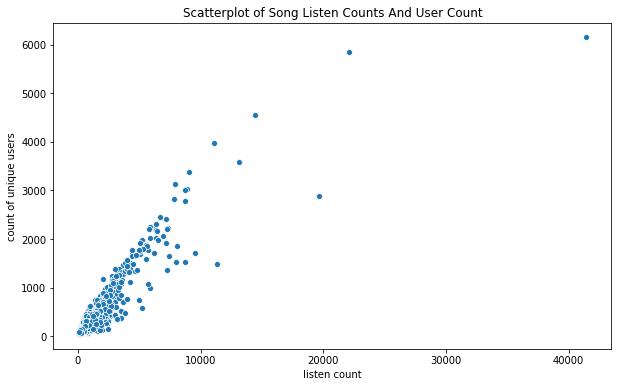

In [19]:
fig4 = plt.figure(figsize=(10,6))

sns.scatterplot(user_song_count.listen_count, user_song_count.user_id)
plt.xlabel("listen count")
plt.ylabel("count of unique users")
plt.title("Scatterplot of Song Listen Counts And User Count")

The scatterplot shows that there is a relationship between number of listens and number of users. With the exception of a couple of outliers, the number of users that listen to a song increases as the number of listens increases. This tells us that the listen count of our popular songs is not skewed by a few users with extreme listen counts.

### Whats the total listen count of each user? 
Now we want to see the distribution of the amount of times a user listens to any song (total listen count). Again, if a large amount of the users also listen once this could make our dataset not usable for training a recommendation engine.

In [20]:
# explore distribution of the listen count of each user

user_listen_count = user_df.groupby('user_id').sum()[['listen_count']]
user_listen_count.describe()


,listen_count
count,74905.000000
mean,43.909272
std,68.631875
min,1.000000
25%,8.000000
50%,21.000000
75%,51.000000
max,2571.000000


Text(0.5, 0, 'User listen count')

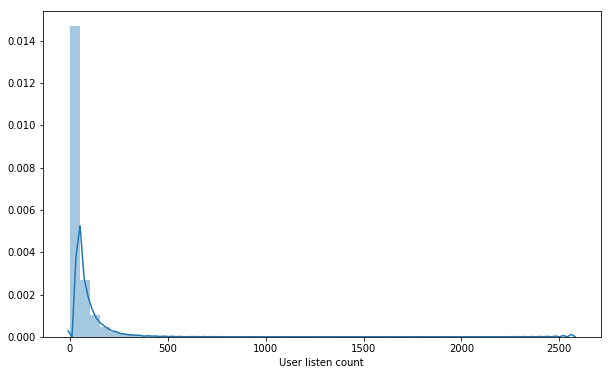

In [21]:
fig4 = plt.figure(figsize=(10,6))

sns.distplot(user_listen_count)
plt.xlabel("User listen count")

Text(0.5, 0, 'User listen count')

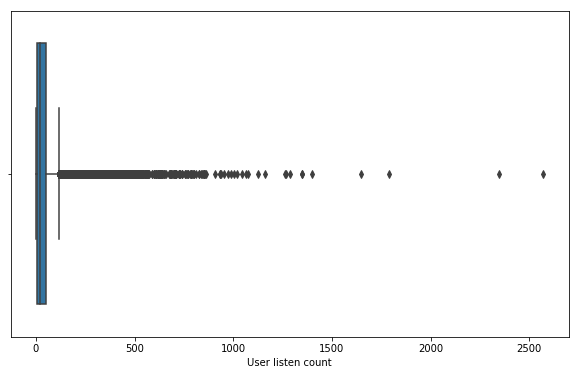

In [22]:
fig4 = plt.figure(figsize=(10,6))

sns.boxplot(user_listen_count)
plt.xlabel("User listen count")

In [23]:
len(user_listen_count[user_listen_count['listen_count'] > 1000])

17

In [24]:
len(user_listen_count[user_listen_count['listen_count'] == 1])

2064

Only 2064 users have a listen count of one. This is a low percentage, making our dataset valid for building our model.

## Conclusion:

This EDA tells us that we have a valid dataset to begin training our recommendation engine. There are some songs that are 'outliers' in regards to listen count however we will not remove these outliers. We will just keep these songs in mind during the modeling stage and make sure they are not recommended to a lot of users solely due to their popularity. 